# Data Science com a base de dados de candidatos do TSE de MINAS GERAIS (ANO: 2016)

### Análise feita por: Leonardo Flores 

## Importar as bibliotecas

In [13]:
from IPython.display import Image  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Leitura da base de dados

In [14]:
filename = 'data/consulta_cand_2016_MG.txt'


cols = [
    "DATA_GERACAO","HORA_GERACAO","ANO_ELEICAO","NUM_TURNO","DESCRICAO_ELEICAO","SIGLA_UF","SIGLA_UE",
    "DESCRICAO_UE","CODIGO_CARGO","DESCRICAO_CARGO", "NOME_CANDIDATO","SEQUENCIAL_CANDIDATO","NUMERO_CANDIDATO",
    "CPF_CANDIDATO","NOME_URNA_CANDIDATO","COD_SITUACAO_CANDIDATURA","DES_SITUACAO_CANDIDATURA","NUMERO_PARTIDO",
    "SIGLA_PARTIDO","NOME_PARTIDO","CODIGO_LEGENDA","SIGLA_LEGENDA","COMPOSICAO_LEGENDA","NOME_LEGENDA",
    "CODIGO_OCUPACAO","DESCRICAO_OCUPACAO","DATA_NASCIMENTO","NUM_TITULO_ELEITORAL_CANDIDATO","IDADE_DATA_ELEICAO",
    "CODIGO_SEXO","DESCRICAO_SEXO","COD_GRAU_INSTRUCAO","DESCRICAO_GRAU_INSTRUCAO","CODIGO_ESTADO_CIVIL",
    "DESCRICAO_ESTADO_CIVIL","CODIGO_COR_RACA","DESCRICAO_COR_RACA","CODIGO_NACIONALIDADE", 
    "DESCRICAO_NACIONALIDADE","SIGLA_UF_NASCIMENTO","CODIGO_MUNICIPIO_NASCIMENTO","NOME_MUNICIPIO_NASCIMENTO",
    "DESPESA_MAX_CAMPANHA","COD_SIT_TOT_TURNO","DESC_SIT_TOT_TURNO","NM_EMAIL",
]

df = pd.read_csv(filename, sep=";", names=cols, encoding='iso-8859-1')
df.head(5)

,DATA_GERACAO,HORA_GERACAO,ANO_ELEICAO,NUM_TURNO,DESCRICAO_ELEICAO,SIGLA_UF,SIGLA_UE,DESCRICAO_UE,CODIGO_CARGO,DESCRICAO_CARGO,...,DESCRICAO_COR_RACA,CODIGO_NACIONALIDADE,DESCRICAO_NACIONALIDADE,SIGLA_UF_NASCIMENTO,CODIGO_MUNICIPIO_NASCIMENTO,NOME_MUNICIPIO_NASCIMENTO,DESPESA_MAX_CAMPANHA,COD_SIT_TOT_TURNO,DESC_SIT_TOT_TURNO,NM_EMAIL
0,09/05/2017,19:15:24,2016,1,Eleições Municipais 2016,MG,45012,EXTREMA,13,VEREADOR,...,BRANCA,1,BRASILEIRA NATA,SP,-3,EXTREMA,0,5,SUPLENTE,EXTREMAFITNESS@OUTLOOK.COM
1,09/05/2017,19:15:24,2016,1,Eleições Municipais 2016,MG,43893,CORONEL MURTA,13,VEREADOR,...,PRETA,1,BRASILEIRA NATA,MG,-3,CORONEL MURTA,0,5,SUPLENTE,COLIGACAOCORONELMURTA@GMAIL.COM
2,09/05/2017,19:15:24,2016,1,Eleições Municipais 2016,MG,43893,CORONEL MURTA,13,VEREADOR,...,PARDA,1,BRASILEIRA NATA,MG,-3,CORONEL MURTA,0,5,SUPLENTE,COLIGACAOCORONELMURTA@GMAIL.COM
3,09/05/2017,19:15:24,2016,1,Eleições Municipais 2016,MG,49891,PEQUERI,13,VEREADOR,...,BRANCA,1,BRASILEIRA NATA,MG,-3,PEQUERI,-1,5,SUPLENTE,FABRICIOCOSTAGARCIA@GMAIL.COM
4,09/05/2017,19:15:24,2016,1,Eleições Municipais 2016,MG,49891,PEQUERI,13,VEREADOR,...,BRANCA,1,BRASILEIRA NATA,MG,-3,MAR DE ESPANHA,-1,5,SUPLENTE,FABRICIOCOSTAGARCIA@GMAIL.COM


## 2. Limpeza e Filtragem dos dados

In [15]:
# Filtrar colunas

select_cols = [
    'CPF_CANDIDATO', 'NUMERO_CANDIDATO', 'NOME_CANDIDATO', 'SIGLA_PARTIDO', 'SIGLA_UF_NASCIMENTO', 
    'NOME_MUNICIPIO_NASCIMENTO','DESCRICAO_UE','DESCRICAO_CARGO', 'IDADE_DATA_ELEICAO', 'DESC_SIT_TOT_TURNO'
]

# Resumir a situação (DESC_SIT_TOT_TURNO)

def check_situation(situation):
    situations = {
        '2º TURNO': 'segundo turno',
        'RENÚNCIA/FALECIMENTO COM SUBSTITUIÇÃO': 'substituído', 'SUBSTITUÍDO': 'substituído', 
        'SUPLENTE': 'suplente',
        'ELEITO': 'eleito','ELEITO POR QP': 'eleito','MÉDIA': 'eleito', 'ELEITO POR MÉDIA': 'eleito', 
        '#NE#': 'não eleito','NÃO ELEITO': 'não eleito','#NULO#': 'não eleito',
        'REGISTRO NEGADO ANTES DA ELEIÇÃO': 'cassado','INDEFERIDO COM RECURSO': 'cassado', 
        'RENÚNCIA/FALECIMENTO/CASSAÇÃO ANTES DA ELEIÇÃO': 'cassado', 'REGISTRO NEGADO APÓS A ELEIÇÃO': 'cassado',
        'RENÚNCIA/FALECIMENTO/CASSAÇÃO APÓS A ELEIÇÃO': 'cassado','CASSADO COM RECURSO': 'cassado',
    }
    return situations[situation]

df.DESC_SIT_TOT_TURNO = df.DESC_SIT_TOT_TURNO.map(check_situation)

df = df[select_cols]
df.head(5)

,CPF_CANDIDATO,NUMERO_CANDIDATO,NOME_CANDIDATO,SIGLA_PARTIDO,SIGLA_UF_NASCIMENTO,NOME_MUNICIPIO_NASCIMENTO,DESCRICAO_UE,DESCRICAO_CARGO,IDADE_DATA_ELEICAO,DESC_SIT_TOT_TURNO
0,3197815696,45444,EDNA SILVA MARCELINO,PSDB,SP,EXTREMA,EXTREMA,VEREADOR,40,suplente
1,46689451615,45789,JOAO BOSCO CALDEIRA,PSDB,MG,CORONEL MURTA,CORONEL MURTA,VEREADOR,65,suplente
2,63903873691,45321,NELMA MARIA CAIRES RIBEIRO SANTOS,PSDB,MG,CORONEL MURTA,CORONEL MURTA,VEREADOR,59,suplente
3,47791870606,45678,STELLA MARY RODRIGUES,PSDB,MG,PEQUERI,PEQUERI,VEREADOR,54,suplente
4,5774811697,45145,LEONARDO VITAL RODRIGUES,PSDB,MG,MAR DE ESPANHA,PEQUERI,VEREADOR,32,suplente


## 3. Análise e Visualização de Dados

### Número de candidatos

In [16]:
print('{} Candidatos em Minas Gerais no ano de 2016'.format(len(df.index)))

78722 Candidatos em Minas Gerais no ano de 2016


### Média de idade dos candidatos

In [17]:
print('A média de idade dos candidatos é {:.0f} anos'.format(df.IDADE_DATA_ELEICAO.mean()))

A média de idade dos candidatos é 45 anos


### Estatística descritiva de candidatos por cidades

In [18]:
num_candidates_by_cities = df.groupby("DESCRICAO_UE").size()

print('A média de candidatos por cidades é {:.0f} candidatos'.format(num_candidates_by_cities.mean()))
print('O menor número de candidatos é igual a {:.0f}'.format(num_candidates_by_cities.min()))
print('O maior número de candidatos é igual a {:.0f}'.format(num_candidates_by_cities.max()))

A média de candidatos por cidades é 92 candidatos
O menor número de candidatos é igual a 21
O maior número de candidatos é igual a 1488


### As 10 cidades com mais candidatos

In [19]:
cities = num_candidates_by_cities.sort_values(ascending=False).head(10)
cities

DESCRICAO_UE
BELO HORIZONTE          1488
UBERLÂNDIA               697
CONTAGEM                 585
BETIM                    568
SANTA LUZIA              441
JUIZ DE FORA             441
GOVERNADOR VALADARES     432
MONTES CLAROS            421
SETE LAGOAS              388
PARÁ DE MINAS            368
dtype: int64

### Gráfico de Barra

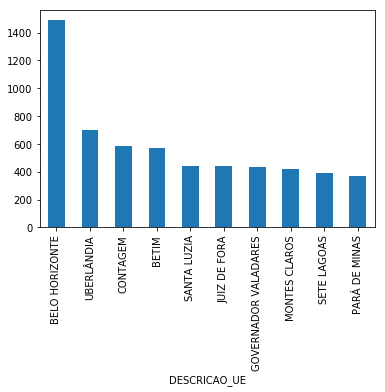

In [20]:
cities.plot(kind='bar')

## 4. Análise de candidatos que não candidataram para sua cidade natal

In [21]:
condition = df['NOME_MUNICIPIO_NASCIMENTO'] != df['DESCRICAO_UE']

df_candidatos = df.loc[condition]
df_candidatos.head(5)

,CPF_CANDIDATO,NUMERO_CANDIDATO,NOME_CANDIDATO,SIGLA_PARTIDO,SIGLA_UF_NASCIMENTO,NOME_MUNICIPIO_NASCIMENTO,DESCRICAO_UE,DESCRICAO_CARGO,IDADE_DATA_ELEICAO,DESC_SIT_TOT_TURNO
4,5774811697,45145,LEONARDO VITAL RODRIGUES,PSDB,MG,MAR DE ESPANHA,PEQUERI,VEREADOR,32,suplente
5,38397722653,45369,GERSOM DE MELLO,PSDB,MG,MAR DE ESPANHA,PEQUERI,VEREADOR,53,suplente
7,4538473669,10333,GLADSON APARECIDO DA SILVA,PRB,MG,BELO HORIZONTE,GUANHÃES,VEREADOR,35,não eleito
10,8304102609,22333,RUDSON FAGUNDES DE OLIVEIRA,PR,MG,CURVELO,GOUVEIA,VEREADOR,28,eleito
11,7652592658,25609,CINTIA HELENA OLIVEIRA,DEM,RJ,BARRA MANSA,BOM JARDIM DE MINAS,VEREADOR,27,suplente


### Número de candidatos

In [22]:
print('{} Candidatos que não candidataram para sua cidade natal em Minas Gerais no ano de 2016'.format(len(df_candidatos.index)))

42953 Candidatos que não candidataram para sua cidade natal em Minas Gerais no ano de 2016


### Candidatos a prefeito que não candidataram para sua cidade natal

In [23]:
condition = df_candidatos['DESCRICAO_CARGO'] == 'PREFEITO'

df_prefeitos = df_candidatos.loc[condition]
df_prefeitos.head(5)

,CPF_CANDIDATO,NUMERO_CANDIDATO,NOME_CANDIDATO,SIGLA_PARTIDO,SIGLA_UF_NASCIMENTO,NOME_MUNICIPIO_NASCIMENTO,DESCRICAO_UE,DESCRICAO_CARGO,IDADE_DATA_ELEICAO,DESC_SIT_TOT_TURNO
19,4768285627,23,JOSÉ REIS NOGUEIRA DE BARROS,PPS,MG,JANUÁRIA,BONITO DE MINAS,PREFEITO,35,eleito
80,27992918649,11,ALAOR JOSE MACHADO,PP,MG,DORES DO INDAIA,SERRA DA SAUDADE,PREFEITO,62,eleito
149,82245932668,55,EDSON RODRIGUES SUZART JUNIOR,PSD,MG,MONTES CLAROS,LUISLÂNDIA,PREFEITO,47,eleito
162,98316834634,22,ANDRE LUIZ EUFRASIO,PR,MG,BICAS,GUARARÁ,PREFEITO,42,não eleito
211,50760300615,15,JOAQUIM SIMEÃO DE FARIA NETO,PMDB,MG,JUIZ DE FORA,PEQUERI,PREFEITO,52,eleito


### Número de candidatos

In [24]:
print('{} Candidatos a prefeito que não candidataram para sua cidade natal em Minas Gerais no ano de 2016'.format(len(df_prefeitos.index)))

1336 Candidatos a prefeito que não candidataram para sua cidade natal em Minas Gerais no ano de 2016
